In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'2010_2020_preTweet.csv')

In [3]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [4]:
df

,peak_date,release_date,song,artist,peak_rank,current_rank,last_rank,weeks_board,lyrics,lyrics_score,lyrics_neg,lyrics_neu,lyrics_pos,lyrics_compound,lyrics_label,spotify_pop,spotify_id,spotify_explicit,days
0,2020-12-26,2020-12-11,Willow,Taylor Swift,1,1,NaN,1,[Verse 1] I'm like the water when your ship ro...,"{'neg': 0.085, 'neu': 0.773, 'pos': 0.141, 'co...",0.085,0.773,0.141,0.9829,pos,82,0lx2cLdOt3piJbcaXIV74f,False,15
1,2020-12-26,2020-07-24,Mood,24kGoldn Featuring iann dior,1,5,2.0,19,"Why you always such a noob Walking round, acti...","{'neg': 0.089, 'neu': 0.796, 'pos': 0.115, 'co...",0.089,0.796,0.115,0.9751,pos,89,4jPy3l0RUwlUI9T5XHBW2m,True,155
2,2020-12-26,2020-10-30,Positions,Ariana Grande,1,8,4.0,8,[Verse 1] Heaven sent you to me I'm just hopin...,"{'neg': 0.039, 'neu': 0.803, 'pos': 0.157, 'co...",0.039,0.803,0.157,0.9935,pos,88,35mvY5S1H3J2QZyna3TFe0,True,57
3,2020-12-26,2020-11-20,Dynamite,BTS,1,9,24.0,17,"[Intro: Jung Kook] 'Cause I, I, I'm in the sta...","{'neg': 0.03, 'neu': 0.82, 'pos': 0.15, 'compo...",0.030,0.820,0.150,0.9946,pos,88,5QDLhrAOJJdNAmCTJ8xMyW,False,36
4,2020-12-26,2020-09-18,Holy,Justin Bieber Featuring Chance The Rapper,3,13,9.0,13,[Verse 1: Justin Bieber] I hear a lot about si...,"{'neg': 0.07, 'neu': 0.799, 'pos': 0.131, 'com...",0.070,0.799,0.131,0.9863,pos,80,5u1n1kITHCxxp8twBcZxWy,False,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5066,2010-01-02,2009-05-15,Elevator,Eminem,67,67,NaN,1,"[Intro] All aboard! Okay, next stop, my baseme...","{'neg': 0.128, 'neu': 0.785, 'pos': 0.087, 'co...",0.128,0.785,0.087,-0.9918,neg,52,26rUU3JZ9JB9OkEuG9mb3e,True,232
5067,2010-01-02,2009-01-01,On Fire,Lil Wayne,62,84,62.0,2,"[Hook] Mama bad, mama mean Gasoline, she’s on ...","{'neg': 0.184, 'neu': 0.681, 'pos': 0.135, 'co...",0.184,0.681,0.135,-0.9785,neg,37,50mX6QmpQX4cCsRYJ9fGM3,True,366
5068,2010-01-02,2009-11-24,I Get It In,Omarion Featuring Gucci Mane,83,98,92.0,7,[Intro: Omarion & Gucci Mane] Oh! Omarion (It'...,"{'neg': 0.045, 'neu': 0.903, 'pos': 0.052, 'co...",0.045,0.903,0.052,-0.4019,neg,28,2E6gb0Ngrvun6CUAUkvZPI,True,39
5069,2019-12-21,2019-05-13,We Were,Keith Urban,65,94,66.0,15,[Verse 1] We were just a couple years short of...,"{'neg': 0.059, 'neu': 0.867, 'pos': 0.073, 'co...",0.059,0.867,0.073,0.7851,pos,55,5Net7uzpcqkJtOwR22onye,False,222


In [5]:
import matplotlib.pyplot as plt

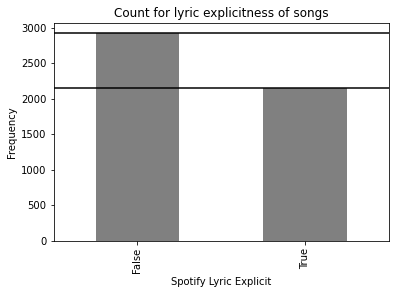

In [6]:
ax = df['spotify_explicit'].value_counts().plot(kind='bar',
                                    figsize=(6,4),
                                    title="Count for lyric explicitness of songs", color='grey',
                                               xerr = df['spotify_explicit'].value_counts())
ax.set_xlabel("Spotify Lyric Explicit")
ax.set_ylabel("Frequency")

plt.show()

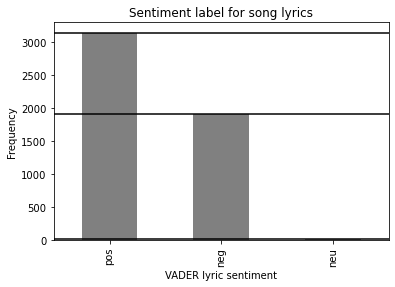

In [7]:
ax = df['lyrics_label'].value_counts().plot(kind='bar',
                                    figsize=(6,4),
                                    title="Sentiment label for song lyrics", color='grey',
                                               xerr = df['lyrics_label'].value_counts())
ax.set_xlabel("VADER lyric sentiment")
ax.set_ylabel("Frequency")

plt.show()

In [8]:
from collections import Counter

artist_name = Counter(df['artist']).keys() # equals to list(set(words))
artist_counts = Counter(df['artist']).values()

In [9]:
d = {'artist': artist_name, 'count': artist_counts}
artist_info = pd.DataFrame(data=d)

In [10]:
art = artist_info.sort_values(by=['count'], ascending=False).head(10)

In [11]:
art

,artist,count
1729,Glee Cast,156
209,Drake,94
0,Taylor Swift,93
107,Future,42
7,The Weeknd,42
45,Justin Bieber,39
2,Ariana Grande,38
277,Lil Uzi Vert,36
108,YoungBoy Never Broke Again,33
222,J. Cole,31


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

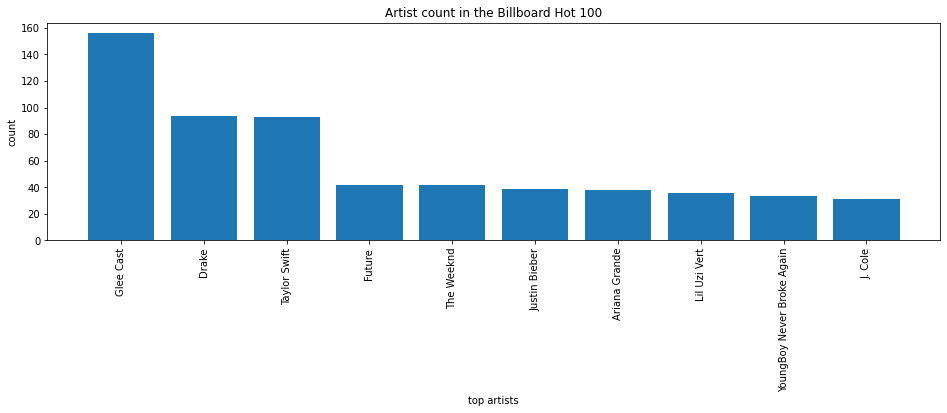

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.bar(art['artist'], art['count'])
plt.xlabel("top artists")
plt.ylabel("count")
plt.title("Artist count in the Billboard Hot 100")
plt.xticks(rotation=90)
#plt.savefig('top artists.png')

In [13]:
large = df.nlargest(10, 'weeks_board')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

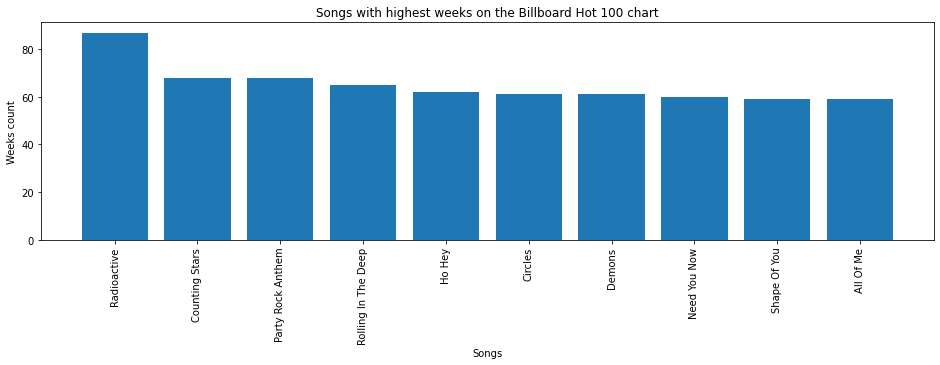

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.bar(large['song'], large['weeks_board'])
plt.xlabel("Songs")
plt.ylabel("Weeks count")
plt.title("Songs with highest weeks on the Billboard Hot 100 chart")
plt.xticks(rotation=90)
#plt.savefig('top artists.png')

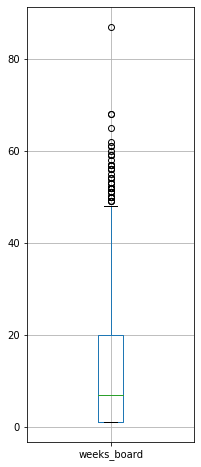

In [15]:
boxplot = df.boxplot(column=['weeks_board'], figsize=(3,8))

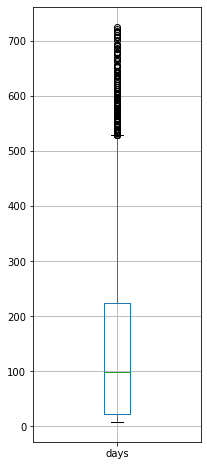

In [16]:
boxplot = df.boxplot(column=['days'], figsize=(3,8))

In [29]:
df.head()

,peak_date,release_date,song,artist,peak_rank,current_rank,last_rank,weeks_board,lyrics,lyrics_score,lyrics_neg,lyrics_neu,lyrics_pos,lyrics_compound,lyrics_label,spotify_pop,spotify_id,spotify_explicit,days
0,2020-12-26,2020-12-11,Willow,Taylor Swift,1,1,NaN,1,[Verse 1] I'm like the water when your ship ro...,"{'neg': 0.085, 'neu': 0.773, 'pos': 0.141, 'co...",0.085,0.773,0.141,0.9829,pos,82,0lx2cLdOt3piJbcaXIV74f,False,15
1,2020-12-26,2020-07-24,Mood,24kGoldn Featuring iann dior,1,5,2.0,19,"Why you always such a noob Walking round, acti...","{'neg': 0.089, 'neu': 0.796, 'pos': 0.115, 'co...",0.089,0.796,0.115,0.9751,pos,89,4jPy3l0RUwlUI9T5XHBW2m,True,155
2,2020-12-26,2020-10-30,Positions,Ariana Grande,1,8,4.0,8,[Verse 1] Heaven sent you to me I'm just hopin...,"{'neg': 0.039, 'neu': 0.803, 'pos': 0.157, 'co...",0.039,0.803,0.157,0.9935,pos,88,35mvY5S1H3J2QZyna3TFe0,True,57
3,2020-12-26,2020-11-20,Dynamite,BTS,1,9,24.0,17,"[Intro: Jung Kook] 'Cause I, I, I'm in the sta...","{'neg': 0.03, 'neu': 0.82, 'pos': 0.15, 'compo...",0.030,0.820,0.150,0.9946,pos,88,5QDLhrAOJJdNAmCTJ8xMyW,False,36
4,2020-12-26,2020-09-18,Holy,Justin Bieber Featuring Chance The Rapper,3,13,9.0,13,[Verse 1: Justin Bieber] I hear a lot about si...,"{'neg': 0.07, 'neu': 0.799, 'pos': 0.131, 'com...",0.070,0.799,0.131,0.9863,pos,80,5u1n1kITHCxxp8twBcZxWy,False,99


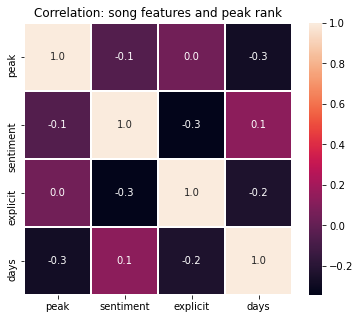

In [26]:
d = {'peak': df['peak_rank'], 'sentiment': df['lyrics_compound'], 'explicit': df['spotify_explicit'], 'days': df['days']}
df1 = pd.DataFrame(data=d)

import seaborn as sns
f,ax = plt.subplots(figsize=(6,5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Correlation: song features and peak rank")
plt.savefig('line_plot.pdf')  

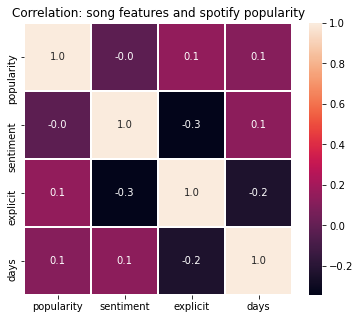

In [27]:
d = {'popularity': df['spotify_pop'], 'sentiment': df['lyrics_compound'], 'explicit': df['spotify_explicit'], 'days': df['days']}
df2 = pd.DataFrame(data=d)

import seaborn as sns
f,ax = plt.subplots(figsize=(6,5))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Correlation: song features and spotify popularity")
plt.savefig('line_plot.pdf') 

Text(0.5, 1.0, 'Distribution of weeks on the chart')

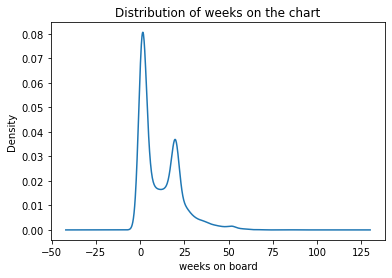

In [20]:
weeks = df['weeks_board']
weeks.plot.kde()
plt.xlabel("weeks on board")
plt.title("Distribution of weeks on the chart")

Text(0.5, 1.0, 'Distribution of release and peak rank difference in days')

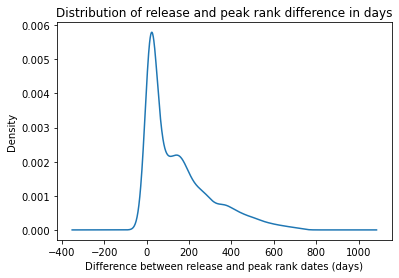

In [21]:
days = df['days']
days.plot.kde()
plt.xlabel("Difference between release and peak rank dates (days)")
plt.title("Distribution of release and peak rank difference in days")

Text(0.5, 1.0, 'Distribution of the Spotify Popularity Scores')

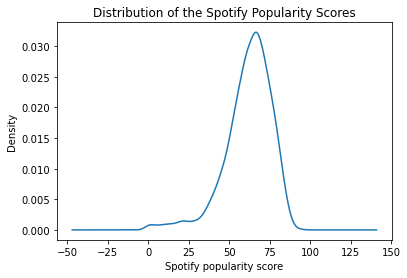

In [28]:
pop = df['spotify_pop']
pop.plot.kde()
plt.xlabel("Spotify popularity score")
plt.title("Distribution of the Spotify Popularity Scores")

In [23]:
sort = df.sort_values(by=['days'])

([], [])

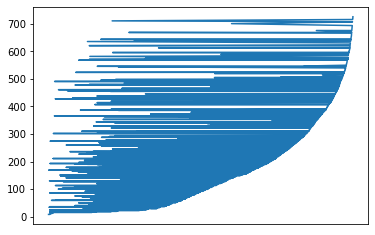

In [24]:
plt.plot(sort['song'], sort['days'])
plt.xticks([])